### Import modules

In [133]:
import numpy as np
import pandas as pd
from datetime import datetime, time
import missingno as msn
import re
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set()

### Load dataset

In [134]:
OACI_dataset = pd.read_csv("Datasets/AccidentesAviones.csv")

In [135]:
OACI_dataset.shape

(5008, 18)

In [136]:
OACI_dataset.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [137]:
OACI_dataset.tail()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."
5007,5007,"July 06, 2021",1500,"Palana, Russia",Kamchatka Aviation Enterprise,251,Petropavlovsk - Palana,Antonov An 26B-100,RA-26085,12310,28,22,6,28,22,6,0,The passenger plane crashed into the top of a ...


### Atributes description

In [138]:
OACI_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

In [139]:
atributes = {"Unnamed" : ["Index"],
             "Date" : ["Date of accident"],
             "Time" : ["Local time, in 24 hr. in the format hh:mm"],
             "Location" : ["Location of the accident"],
             "Operator" : ["Airline or operator of the aircraft"],
             "Flight" : ["Flight number assigned by the aircraft operator"],
             "Route" : ["Complete or partial route flown prior to the accident"],
             "Type" : ["Aircraft type"],
             "Registration" : ["ICAO registration of the aircraft"],
             "cn/In" : ["Construction or serial number / Line or fuselage number"],
             "Total_Aboard" : ["Total people aboard"],
             "Passengers_Aboard" : ["Passengers aboard"],
             "Crew_Aboard" : ["Crew aboard"],
             "Total_Fatalities" : ["Total fatalities"],
             "Passengers_Fatalities" : ["Passengers fatalities"],
             "Crew_Fatalities" : ["Crew fatalities"],
             "Ground" : ["Total killed on the ground"],
             "Summary" : ["Brief description of the accident and cause if known"]}

### First, normalize atributes names

In [140]:
new_atributes_names = list(atributes.keys())
OACI_dataset.columns = new_atributes_names
OACI_dataset.columns

Index(['Unnamed', 'Date', 'Time', 'Location', 'Operator', 'Flight', 'Route',
       'Type', 'Registration', 'cn/In', 'Total_Aboard', 'Passengers_Aboard',
       'Crew_Aboard', 'Total_Fatalities', 'Passengers_Fatalities',
       'Crew_Fatalities', 'Ground', 'Summary'],
      dtype='object')

### There is a lot of "?", they will be interpreted as nulls

In [141]:
OACI_dataset.replace("?", np.nan, inplace = True)
OACI_dataset.head()

,Unnamed,Date,Time,Location,Operator,Flight,Route,Type,Registration,cn/In,Total_Aboard,Passengers_Aboard,Crew_Aboard,Total_Fatalities,Passengers_Fatalities,Crew_Fatalities,Ground,Summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


#### Number of missing values

In [142]:
missing = pd.concat([OACI_dataset.isnull().sum(), 100 * OACI_dataset.isnull().mean()], axis = 1)
missing.columns = ["count", "%"]
missing.sort_values(by = "%", ascending = False)

,count,%
Flight,3682,73.522364
Time,1504,30.031949
Route,762,15.215655
cn/In,667,13.318690
Registration,272,5.431310
Crew_Fatalities,235,4.692492
Passengers_Fatalities,235,4.692492
Passengers_Aboard,221,4.412939
Crew_Aboard,219,4.373003
Summary,59,1.178115


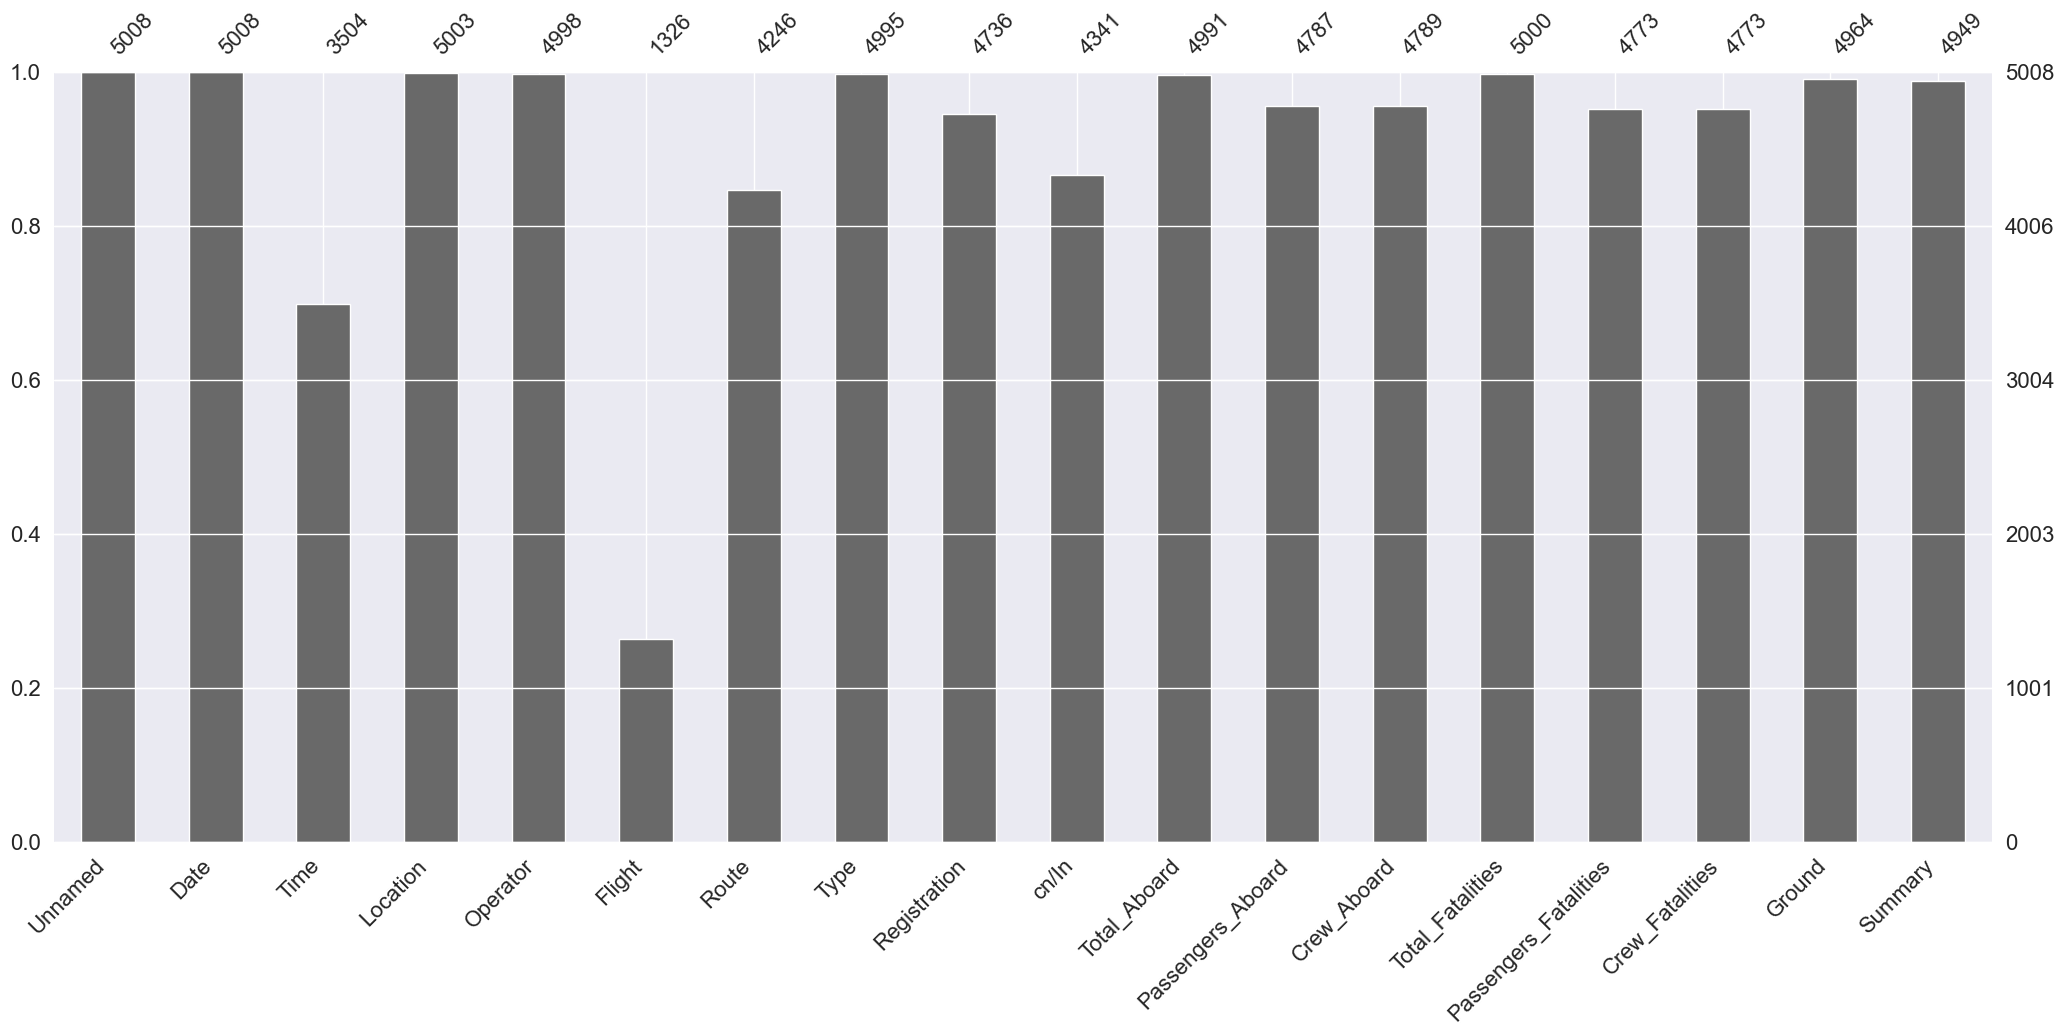

In [143]:
msn.bar(OACI_dataset)
plt.show()

### The flight and time attributes will not provide much information

In [144]:
OACI_dataset.drop(columns = ["Flight", "Time"], inplace = True)

### Replace /r y \r for /

In [145]:
columns_to_replace = ["Location", "Operator", "Route", "Type", "Registration", "cn/In", "Summary"]
OACI_dataset[columns_to_replace] = OACI_dataset[columns_to_replace].replace(to_replace = r"/r | \r", value = "/", regex = True)

### We already have the total of these columns, drop them and some information we don't need

In [146]:
OACI_dataset.drop(columns = ["Registration", "cn/In", "Passengers_Aboard", "Crew_Aboard", "Passengers_Fatalities", "Crew_Fatalities"], inplace = True)

### Correct data type

In [147]:
OACI_dataset["Total_Aboard"] = OACI_dataset["Total_Aboard"].astype(float)
OACI_dataset["Total_Fatalities"] = OACI_dataset["Total_Fatalities"].astype(float)
OACI_dataset["Ground"] = OACI_dataset["Ground"].astype(float)

In [148]:
print(OACI_dataset["Date"])
print(type(OACI_dataset["Date"][0]))  # Dates in string format

0       September 17, 1908
1       September 07, 1909
2            July 12, 1912
3          August 06, 1913
4       September 09, 1913
               ...        
5003        March 28, 2021
5004          May 21, 2021
5005         June 10, 2021
5006         July 04, 2021
5007         July 06, 2021
Name: Date, Length: 5008, dtype: object
<class 'str'>


In [149]:
OACI_dataset["Date"] = pd.to_datetime(OACI_dataset["Date"])

### Decompose the date and drop it

In [150]:
OACI_dataset["Year"] = OACI_dataset["Date"].dt.year
OACI_dataset["Month"] = OACI_dataset["Date"].dt.strftime("%b")
OACI_dataset["Weekday"] = OACI_dataset["Date"].dt.day_name()
OACI_dataset.drop(columns = "Date", inplace = True)
OACI_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed           5008 non-null   int64  
 1   Location          5003 non-null   object 
 2   Operator          4998 non-null   object 
 3   Route             4246 non-null   object 
 4   Type              4995 non-null   object 
 5   Total_Aboard      4991 non-null   float64
 6   Total_Fatalities  5000 non-null   float64
 7   Ground            4964 non-null   float64
 8   Summary           4949 non-null   object 
 9   Year              5008 non-null   int64  
 10  Month             5008 non-null   object 
 11  Weekday           5008 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 469.6+ KB


### The year with the highest number of accidents was 1946

In [151]:
accidents_year = OACI_dataset.groupby("Year").size()
print(f"Year with the highest number of accidents: {accidents_year.idxmax()}")

Year with the highest number of accidents: 1946


### There is a decrease from 1989 to 2021

In [152]:
accidents_year[accidents_year == 83]

Year
1989    83
dtype: int64

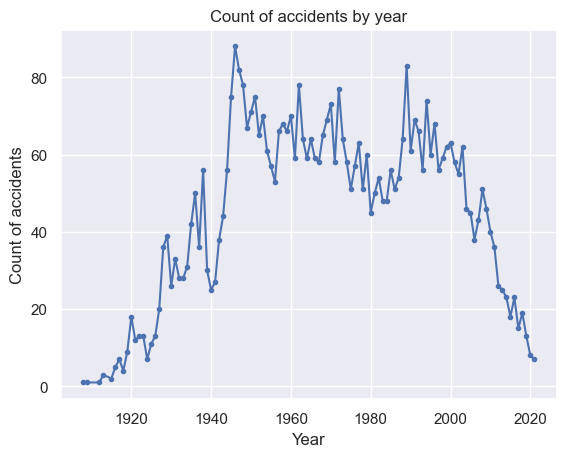

In [153]:
accidents_year = OACI_dataset.groupby("Year").size()
plt.plot(accidents_year.index, accidents_year.values, marker = "o", markersize = 3)
plt.xlabel("Year")
plt.ylabel("Count of accidents")
plt.title("Count of accidents by year")
plt.show()

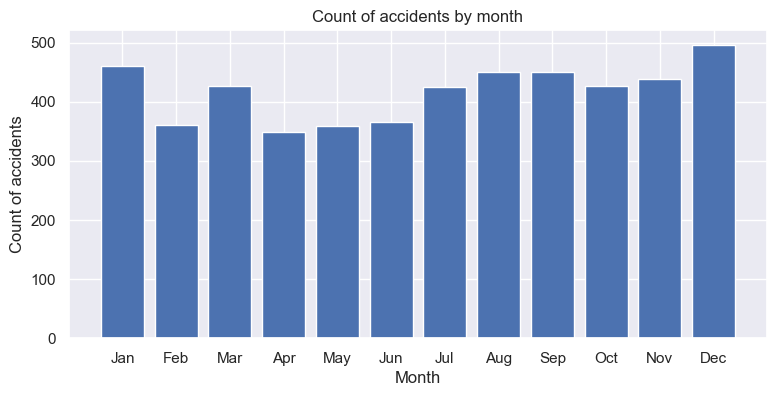

In [154]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
accidents_month = OACI_dataset.groupby("Month").size()
accidents_month = accidents_month.reindex(months)
plt.figure(figsize = (9, 4))
plt.bar(accidents_month.index, accidents_month.values)
plt.xlabel("Month")
plt.ylabel("Count of accidents")
plt.title("Count of accidents by month")
plt.show()

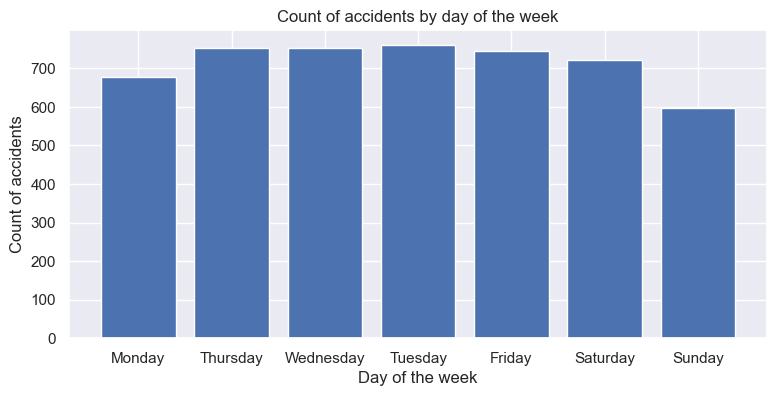

In [155]:
weekdays = ["Monday", "Thursday", "Wednesday", "Tuesday", "Friday", "Saturday", "Sunday"]
accidents_weekday = OACI_dataset.groupby("Weekday").size()
accidents_weekday = accidents_weekday.reindex(weekdays)
plt.figure(figsize = (9, 4))
plt.bar(accidents_weekday.index, accidents_weekday.values)
plt.xlabel("Day of the week")
plt.ylabel("Count of accidents")
plt.title("Count of accidents by day of the week")
plt.show()

### Explore the atributes

In [156]:
OACI_dataset["Unnamed"]

0          0
1          1
2          2
3          3
4          4
        ... 
5003    5003
5004    5004
5005    5005
5006    5006
5007    5007
Name: Unnamed, Length: 5008, dtype: int64

### Unnamed atribute its an index, we alredy have an index

In [157]:
OACI_dataset.drop(columns = "Unnamed", inplace = True)

In [158]:
OACI_dataset["Location"]

0                      Fort Myer, Virginia
1                  Juvisy-sur-Orge, France
2                Atlantic City, New Jersey
3       Victoria, British Columbia, Canada
4                       Over the North Sea
                       ...                
5003                    Near Butte, Alaska
5004                  Near Kaduna, Nigeria
5005            Near Pyin Oo Lwin, Myanmar
5006            Patikul, Sulu, Philippines
5007                        Palana, Russia
Name: Location, Length: 5008, dtype: object

### Create country column

In [159]:
country = OACI_dataset["Location"]
new_countries = country.str.split(',').str[1]
OACI_dataset["Country"] = new_countries
OACI_dataset["Country"] = OACI_dataset["Country"].fillna("No Data")
OACI_dataset["Country"] = OACI_dataset["Country"].str.strip()
countries_dict = OACI_dataset["Country"]
countries_dict = dict(countries_dict.value_counts())

### The USA has many states

In [160]:
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
    "Florida", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky",
    "Louisiana", "Maine", "Maryland", "Massachusetts", "Massachutes", "Michigan", "Minnesota", "Mississippi", "Missouri",
    "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York",
    "North Carolina", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island",
    "South Carolina", "South Dakota", "Tennessee", "Tennesee", "Texas", "Utah", "Vermont", "Virginia", "Washington",
    "West Virginia", "Wisconsin", "Wyoming", "BC", ": Massachusetts", "000 miles west of Honolulu", "near Chicago", "New Orleans", 
    "Deleware", "New York (Idlewild)", "SC", "10 miles SW of Las Vegas", "Washington DC", "Washingon", "US Virgin Islands", "Alakska",
    "Wantagh", "Glens Falls", "10 mile SE of Tell City", "Kodiak Island", "116 miles WSW of Annette Island",
    "near Covington", "Ilinois", "near Silver Plume", "Californiia", "near Point Barrow", "U.S. Samoa", "Cailifornia",
    "Chicago", "near Grants", "Coloado", "Covington", "Near Rapid City, South Dekota", "Mariana Islands", "325 miles east of Wake Island",
    "Bermuda", "near Milton"
]
for clave in us_states:
    if clave in countries_dict:
        OACI_dataset.loc[OACI_dataset['Country'] == clave, 'Country'] = "USA"
    else:
        pass

### Some country normalizations

In [161]:
OACI_dataset.loc[OACI_dataset['Country'] == 'British Columbia', 'Country'] = "Canada"
OACI_dataset.loc[OACI_dataset['Country'] == 'USSR', 'Country'] = "Russia"
OACI_dataset.loc[OACI_dataset['Country'] == 'Newfoundland', 'Country'] = "Canada"
OACI_dataset.loc[OACI_dataset['Country'] == 'Ontario', 'Country'] = "Canada"
OACI_dataset.loc[OACI_dataset['Country'] == 'Quebec Canada', 'Country'] = "Canada"
OACI_dataset.loc[OACI_dataset['Country'] == 'Myanmar', 'Country'] = "Burma"
OACI_dataset.loc[OACI_dataset['Country'] == 'Czechoslovakia', 'Country'] = "Czech Republic"
OACI_dataset.loc[OACI_dataset['Country'] == 'West Germany', 'Country'] = "Germany"
OACI_dataset.loc[OACI_dataset['Country'] == 'North Yorkshirey', 'Country'] = "England"
OACI_dataset.loc[OACI_dataset['Country'] == 'Qld. Australia', 'Country'] = "Australia"
OACI_dataset.loc[OACI_dataset['Country'] == 'Philippine Sea', 'Country'] = "Philippines"
OACI_dataset.loc[OACI_dataset['Country'] == 'Ryukyu Island', 'Country'] = "Japan"
OACI_dataset.loc[OACI_dataset['Country'] == 'Val-de-Marne', 'Country'] = "France"
OACI_dataset.loc[OACI_dataset['Country'] == 'Aargau', 'Country'] = "Switzerland"
OACI_dataset.loc[OACI_dataset['Country'] == 'Guadaloupe', 'Country'] = "France"
OACI_dataset.loc[OACI_dataset['Country'] == 'Aregntina', 'Country'] = "Argentina"
OACI_dataset.loc[OACI_dataset['Country'] == 'Mexic', 'Country'] = "Mexico"
OACI_dataset.loc[OACI_dataset['Country'] == 'Burma (Myanmar)', 'Country'] = "Burma"
OACI_dataset.loc[OACI_dataset['Country'] == 'Madrid', 'Country'] = "Spain"
OACI_dataset.loc[OACI_dataset['Country'] == 'Baangladesh', 'Country'] = "Bangladesh"
OACI_dataset.loc[OACI_dataset['Country'] == 'Gerona', 'Country'] = "Spain"
OACI_dataset.loc[OACI_dataset['Country'] == 'Nuevo Leon', 'Country'] = "Mexico"
OACI_dataset.loc[OACI_dataset['Country'] == 'West Vlaanderen', 'Country'] = "Belgium"
OACI_dataset.loc[OACI_dataset['Country'] == 'South Yemen', 'Country'] = "Yemen"
OACI_dataset.loc[OACI_dataset['Country'] == 'Staines', 'Country'] = "England"
OACI_dataset.loc[OACI_dataset['Country'] == 'Sulu', 'Country'] = "South Africa"
OACI_dataset.loc[OACI_dataset['Country'] == 'East Sardinia', 'Country'] = "Italy"
OACI_dataset.loc[OACI_dataset['Country'] == 'Phillipines', 'Country'] = "Philippines"
OACI_dataset.loc[OACI_dataset['Country'] == 'Philipines', 'Country'] = "Philippines"
OACI_dataset.loc[OACI_dataset['Country'] == 'South-West  Africa (Namibia)', 'Country'] = "Africa"
OACI_dataset.loc[OACI_dataset['Country'] == 'WA', 'Country'] = "Australia"
OACI_dataset.loc[OACI_dataset['Country'] == 'Zulia', 'Country'] = "Venezuela"
OACI_dataset.loc[OACI_dataset['Country'] == 'East Pakistan', 'Country'] = "Pakistan"
OACI_dataset.loc[OACI_dataset['Country'] == 'Reunion', 'Country'] = "France"
OACI_dataset.loc[OACI_dataset['Country'] == 'Yunan', 'Country'] = "China"
OACI_dataset.loc[OACI_dataset['Country'] == 'Western Samoa', 'Country'] = "Samoa"
OACI_dataset.loc[OACI_dataset['Country'] == 'Faeroe Islands', 'Country'] = "Denmark"
OACI_dataset.loc[OACI_dataset['Country'] == 'Placentia Bay', 'Country'] = "Canada"
OACI_dataset.loc[OACI_dataset['Country'] == 'Zimbabwe (Harare', 'Country'] = "Zimbabwe"
OACI_dataset.loc[OACI_dataset['Country'] == 'Lombardia', 'Country'] = "Italy"
OACI_dataset.loc[OACI_dataset['Country'] == 'Jamacia', 'Country'] = "Jamaica"
OACI_dataset.loc[OACI_dataset['Country'] == 'North Island', 'Country'] = "New Zealand"
OACI_dataset.loc[OACI_dataset['Country'] == 'Margarita Island', 'Country'] = "Venezuela"
OACI_dataset.loc[OACI_dataset['Country'] == 'Katanga', 'Country'] = "Democratic Republic Congo"
OACI_dataset.loc[OACI_dataset['Country'] == 'Volcano', 'Country'] = "Peru"
OACI_dataset.loc[OACI_dataset['Country'] == 'Aaland Island', 'Country'] = "Finland"
OACI_dataset.loc[OACI_dataset['Country'] == 'Saudia Arabia\rJeddah', 'Country'] = "Saudi Arabia"
OACI_dataset.loc[OACI_dataset['Country'] == 'Granada', 'Country'] = "Spain"
OACI_dataset.loc[OACI_dataset['Country'] == '100 miles W of Galway Bay', 'Country'] = "Ireland"
OACI_dataset.loc[OACI_dataset['Country'] == 'QC', 'Country'] = "Canada"
OACI_dataset.loc[OACI_dataset['Country'] == 'Mt. Fuji', 'Country'] = "Japan"
OACI_dataset.loc[OACI_dataset['Country'] == 'French Alps', 'Country'] = "Switzerland"
OACI_dataset.loc[OACI_dataset['Country'] == 'Cundinamarca', 'Country'] = "Colombia"
OACI_dataset.loc[OACI_dataset['Country'] == 'Sumatra', 'Country'] = "Indonesia"
OACI_dataset.loc[OACI_dataset['Country'] == 'French Somaliland', 'Country'] = "France"
OACI_dataset.loc[OACI_dataset['Country'] == 'Loire', 'Country'] = "France"
OACI_dataset.loc[OACI_dataset['Country'] == 'near Vitacura', 'Country'] = "Chile"
OACI_dataset.loc[OACI_dataset['Country'] == 'Calabria', 'Country'] = "Italy"
OACI_dataset.loc[OACI_dataset['Country'] == 'Huanuco', 'Country'] = "Peru"
OACI_dataset.loc[OACI_dataset['Country'] == 'Biafra', 'Country'] = "Nigeria"
OACI_dataset.loc[OACI_dataset['Country'] == 'Northern India', 'Country'] = "India"
OACI_dataset.loc[OACI_dataset['Country'] == 'Sussex', 'Country'] = "England"
OACI_dataset.loc[OACI_dataset['Country'] == 'Cheshire', 'Country'] = "England"
OACI_dataset.loc[OACI_dataset['Country'] == 'near Roussillon', 'Country'] = "France"
OACI_dataset.loc[OACI_dataset['Country'] == 'Northwest Territories Canada', 'Country'] = "Canada"
OACI_dataset.loc[OACI_dataset['Country'] == 'UAR', 'Country'] = "Egypt"
OACI_dataset.loc[OACI_dataset['Country'] == 'Da Nang', 'Country'] = "Vietnam"
OACI_dataset.loc[OACI_dataset['Country'] == 'Indian', 'Country'] = "India"
OACI_dataset.loc[OACI_dataset['Country'] == 'Boliva', 'Country'] = "Bolivia"
OACI_dataset.loc[OACI_dataset['Country'] == 'Democratic Republic of the Congo', 'Country'] = "Democratic Republic Congo"
OACI_dataset.loc[OACI_dataset['Country'] == 'Tabasco', 'Country'] = "Mexico"
OACI_dataset.loc[OACI_dataset['Country'] == 'Bias Bay', 'Country'] = "China"
OACI_dataset.loc[OACI_dataset['Country'] == 'Netherlands Indies', 'Country'] = "Indonesia"
OACI_dataset.loc[OACI_dataset['Country'] == 'Uzbekstan', 'Country'] = "Uzbekistan"
OACI_dataset.loc[OACI_dataset['Country'] == 'Oltenia', 'Country'] = "Romania"
OACI_dataset.loc[OACI_dataset['Country'] == 'Prov. Quebec', 'Country'] = "Canada"
OACI_dataset.loc[OACI_dataset['Country'] == 'Mauretania', 'Country'] = "Mauritania"
OACI_dataset.loc[OACI_dataset['Country'] == 'off Ustica', 'Country'] = "Italy"
OACI_dataset.loc[OACI_dataset['Country'] == 'near Tehran', 'Country'] = "Iran"
OACI_dataset.loc[OACI_dataset['Country'] == 'Ross Ice Shelf', 'Country'] = "Antarctica"
OACI_dataset.loc[OACI_dataset['Country'] == 'Jeddah', 'Country'] = "Saudi Arabia"
OACI_dataset.loc[OACI_dataset['Country'] == 'British Columbia Canada', 'Country'] = "Canada"
OACI_dataset.loc[OACI_dataset['Country'] == 'Qld', 'Country'] = "Australia"
OACI_dataset.loc[OACI_dataset['Country'] == 'Rhodesia', 'Country'] = "Zimbabwe"
OACI_dataset.loc[OACI_dataset['Country'] == 'West Indies', 'Country'] = "France"
OACI_dataset.loc[OACI_dataset['Country'] == 'Orly Airport', 'Country'] = "France"
OACI_dataset.loc[OACI_dataset['Country'] == 'Lancs', 'Country'] = "England"
OACI_dataset.loc[OACI_dataset['Country'] == 'Taiwan (Formosa)', 'Country'] = "Taiwan"
OACI_dataset.loc[OACI_dataset['Country'] == 'Hants', 'Country'] = "England"
OACI_dataset.loc[OACI_dataset['Country'] == 'Cameroons', 'Country'] = "Cameroon"
OACI_dataset.loc[OACI_dataset['Country'] == 'Ayrshire', 'Country'] = "Scotland"
OACI_dataset.loc[OACI_dataset['Country'] == 'Cerro de Pasco', 'Country'] = "Peru"
OACI_dataset.loc[OACI_dataset['Country'] == 'SK', 'Country'] = "Canada"
OACI_dataset.loc[OACI_dataset['Country'] == 'Tokyo', 'Country'] = "Japan"
OACI_dataset.loc[OACI_dataset['Country'] == 'West Bengal', 'Country'] = "India"
OACI_dataset.loc[OACI_dataset['Country'] == 'Tanganyika', 'Country'] = "Tanzania"
OACI_dataset.loc[OACI_dataset['Country'] == 'Sardinia', 'Country'] = "Italy"
OACI_dataset.loc[OACI_dataset['Country'] == 'Bugaria', 'Country'] = "Bulgaria"
OACI_dataset.loc[OACI_dataset['Country'] == 'bulgaria', 'Country'] = "Bulgaria"
OACI_dataset.loc[OACI_dataset['Country'] == 'Bulgeria', 'Country'] = "Bulgaria"
OACI_dataset.loc[OACI_dataset['Country'] == 'Bali', 'Country'] = "Indonesia"
OACI_dataset.loc[OACI_dataset['Country'] == 'East Sussex', 'Country'] = "England"
OACI_dataset.loc[OACI_dataset['Country'] == 'Khmer Republic', 'Country'] = "Cambodia"
OACI_dataset.loc[OACI_dataset['Country'] == 'off Kefallinia', 'Country'] = "Greece"
OACI_dataset.loc[OACI_dataset['Country'] == 'Vizcaya', 'Country'] = "Spain"
OACI_dataset.loc[OACI_dataset['Country'] == 'Huila', 'Country'] = "Angola"
OACI_dataset.loc[OACI_dataset['Country'] == 'UAE', 'Country'] = "United Arab Emirates"
OACI_dataset.loc[OACI_dataset['Country'] == 'Rhodesia (Zimbabwe)', 'Country'] = "Zimbabwe"
OACI_dataset.loc[OACI_dataset['Country'] == 'Curacao', 'Country'] = "Netherlands"
OACI_dataset.loc[OACI_dataset['Country'] == 'Netherlands Antilles', 'Country'] = "Netherlands"
OACI_dataset.loc[OACI_dataset['Country'] == 'The Netherlands', 'Country'] = "Netherlands"
OACI_dataset.loc[OACI_dataset['Country'] == 'near Kampung Ladang', 'Country'] = "Malaysia"
OACI_dataset.loc[OACI_dataset['Country'] == 'Island of Madeira', 'Country'] = "Portugal"
OACI_dataset.loc[OACI_dataset['Country'] == 'Hrvatska', 'Country'] = "Yugoslavia"
OACI_dataset.loc[OACI_dataset['Country'] == 'Yugosalvia', 'Country'] = "Yugoslavia"
OACI_dataset.loc[OACI_dataset['Country'] == 'Queensland', 'Country'] = "Australia"

### Create a dictionary with the countries

In [162]:
countries_dict = OACI_dataset["Country"]
countries_dict = dict(countries_dict.value_counts())

### Keep countries with 3 or more accidents

In [163]:
country_counts = OACI_dataset["Country"].value_counts()
frequents = country_counts[country_counts >= 3].index.tolist()
OACI_dataset.loc[~OACI_dataset["Country"].isin(frequents), "Country"] = "No Data"

### Create total deaths, survivors and involved columns 

In [164]:
OACI_dataset["Total_Survivors"] = OACI_dataset["Total_Aboard"] - OACI_dataset["Total_Fatalities"]
OACI_dataset["Total_Deaths"] = OACI_dataset["Ground"] + OACI_dataset["Total_Fatalities"]
OACI_dataset["Total_Involved"] = OACI_dataset["Ground"] + OACI_dataset["Total_Aboard"]
OACI_dataset.head(3)

,Location,Operator,Route,Type,Total_Aboard,Total_Fatalities,Ground,Summary,Year,Month,Weekday,Country,Total_Survivors,Total_Deaths,Total_Involved
0,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,Sep,Thursday,USA,1.0,1.0,2.0
1,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1.0,1.0,0.0,Eugene Lefebvre was the first pilot to ever be...,1909,Sep,Tuesday,France,0.0,1.0,1.0
2,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,Jul,Friday,USA,0.0,5.0,5.0


### The total number of deaths includes both the individuals on board the aircraft and those who died on the ground due to collateral damage

In [165]:
OACI_dataset["Total_Deaths"].max()

2842.0

### The accident with the highest number of deaths was the one on September 11th

In [166]:
OACI_dataset[OACI_dataset["Total_Deaths"] == 2842]

,Location,Operator,Route,Type,Total_Aboard,Total_Fatalities,Ground,Summary,Year,Month,Weekday,Country,Total_Survivors,Total_Deaths,Total_Involved
4346,"New York City, New York",American Airlines,Boston - Los Angeles,Boeing 767-223ER,92.0,92.0,2750.0,The aircraft was hijacked shortly after it lef...,2001,Sep,Tuesday,USA,0.0,2842.0,2842.0


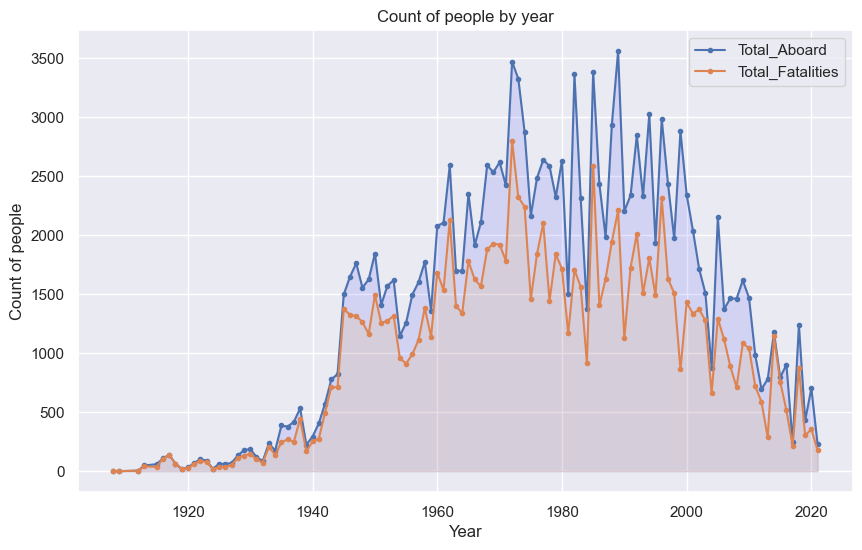

In [167]:
Total_Aboard_Year = OACI_dataset.groupby("Year")["Total_Aboard"].sum()
Total_Fatalities_Year = OACI_dataset.groupby("Year")["Total_Fatalities"].sum()
Total_Aboard_Year.plot(x = Total_Aboard_Year.index, y = Total_Aboard_Year.values, marker = "o", markersize = 3, figsize = (10, 6))
Total_Fatalities_Year.plot(x = Total_Fatalities_Year.index, y = Total_Fatalities_Year.values, marker = "o", markersize = 3)
plt.fill_between(Total_Aboard_Year.index, Total_Aboard_Year.values, color = "blue", alpha = 0.1)
plt.fill_between(Total_Fatalities_Year.index, Total_Fatalities_Year.values, color = "orange", alpha = 0.1)
plt.xlabel("Year")
plt.ylabel("Count of people")
plt.title("Count of people by year")
plt.legend()
plt.show()

### Annual mortality ratio (Total Deaths / Total Involved)

In [168]:
mortality = OACI_dataset[["Year", "Total_Deaths", "Total_Involved"]]
mortality.isna().sum()

Year               0
Total_Deaths      44
Total_Involved    49
dtype: int64

### Remove null values for a more accurate calculation

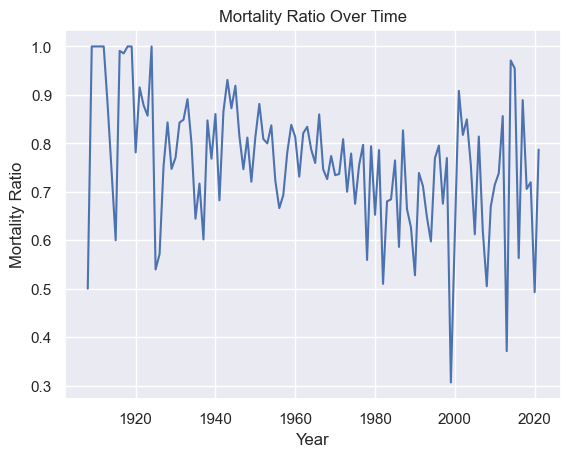

In [169]:
mortality = (OACI_dataset[["Year", "Total_Deaths", "Total_Involved"]]).dropna()
def calculate_ratio(group):
    total_deaths = group["Total_Deaths"].sum()
    total_involved = group["Total_Involved"].sum()
    return total_deaths / total_involved
mortality_ratio = mortality.groupby("Year").apply(calculate_ratio)
mortality_ratio = pd.DataFrame(mortality_ratio)
mortality_ratio = mortality_ratio.rename(columns = {0 : "Mortality_Ratio"})
plt.plot(mortality_ratio.index,mortality_ratio["Mortality_Ratio"])
plt.xlabel("Year")
plt.ylabel("Mortality Ratio")
plt.title("Mortality Ratio Over Time")
plt.show()

### Between 1909 and 1924, the mortality rate reached 1, which means that from the accidents in those years, all individuals involved died

In [170]:
mortality_ratio[mortality_ratio["Mortality_Ratio"] == 1]

,Mortality_Ratio
Year,
1909,1.0
1912,1.0
1918,1.0
1919,1.0
1924,1.0


### De Havilland aircrafts were the ones that experienced the most accidents during this years

In [171]:
mortality_years = [1909, 1912, 1918, 1924]
OACI_dataset["Type"][OACI_dataset["Year"].isin(mortality_years)].value_counts()

De Havilland DH-4          4
Wright Byplane             1
Dirigible                  1
Zeppelin L-59 (airship)    1
Zeppelin L-70 (airship)    1
Zeppelin L-53 (airship)    1
Fokker F.III               1
Junkers F-13               1
Breguet 14                 1
de Havilland DH-34B        1
Name: Type, dtype: int64

### Speaking of aircraft accidents, across all accidents, the majority of them were from Douglas Aircraft Company

In [172]:
types = OACI_dataset.dropna(subset = ["Type"])
douglas_accidents = types["Type"][types["Type"].str.contains("Douglas")].value_counts().sum()
print(f"{douglas_accidents} accidents from Douglas Aircraft Company")

1127 accidents from Douglas Aircraft Company


### Probably, you wouldn't want to travel in a Douglas DC-3

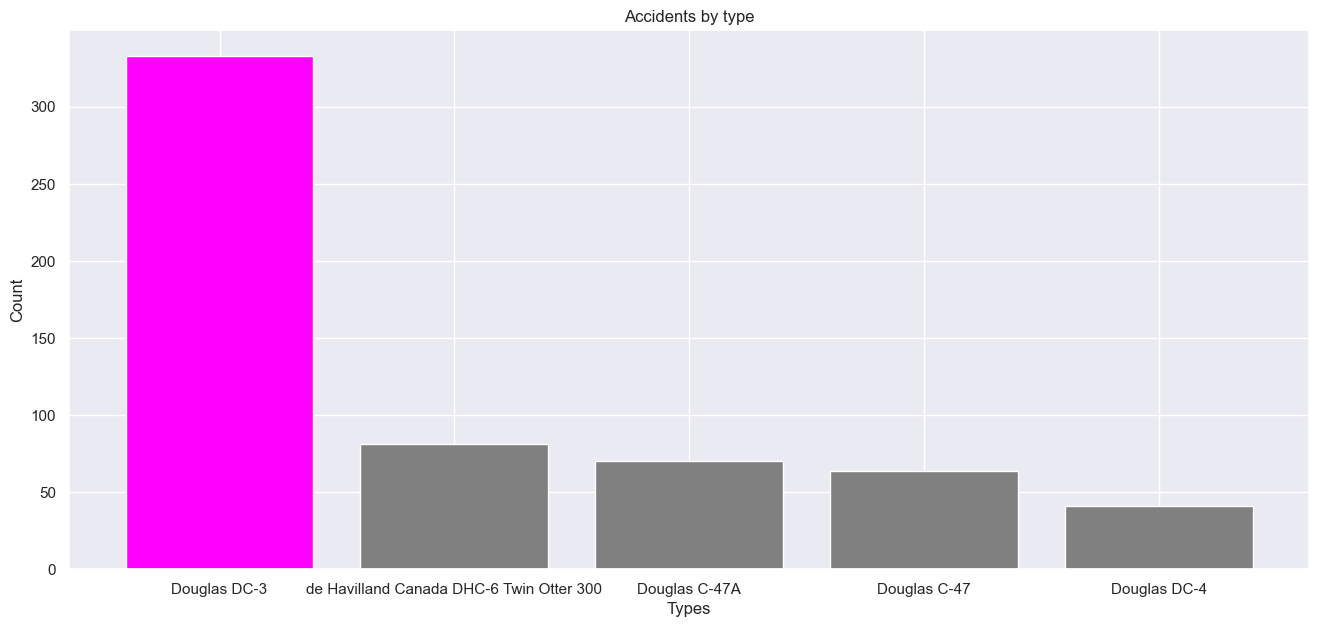

In [173]:
type_counts = OACI_dataset["Type"].value_counts().head()
types = type_counts.index.tolist()
type_count = type_counts.values.tolist()
colors = ["magenta", "gray", "gray", "gray", "gray"]
plt.figure(figsize = (16, 7))
plt.bar(types, type_count, color = colors)
plt.xlabel("Types")
plt.ylabel("Count")
plt.title("Accidents by type")
plt.show()

In [174]:
OACI_dataset["Total_Survivors"].max()

516.0

### In the accident with the highest number of survivors, the plane landed safely, and the only person who died was the pilot, who was stabbed by an individual with mental health issues

In [175]:
OACI_dataset[OACI_dataset["Total_Survivors"] == 516]

,Location,Operator,Route,Type,Total_Aboard,Total_Fatalities,Ground,Summary,Year,Month,Weekday,Country,Total_Survivors,Total_Deaths,Total_Involved
4219,"Tokyo, Japan",All Nippon Airways,"Tokyo, Japan - Chitose, Japan",Boeing B-747,517.0,1.0,0.0,Two minutes after taking off from Haneda Airpo...,1999,Jul,Friday,Japan,516.0,1.0,517.0


In [176]:
print(OACI_dataset["Summary"][OACI_dataset["Total_Survivors"] == 516].values)

['Two minutes after taking off from Haneda Airport, a man carrying a knife forced a flight attendant to take him in the cockpit of the plane.  A fan of computer flight-simulation games, he stated he just wanted to fly a real plane.  After forcing the co-pilot out of the cockpit he ordered the captain to fly to a U.S. Air Force base in western Tokyo. When he refused, he stabbed the captain and seized the controls. After a sudden drop in altitude, the co-pilot and an off duty crew member entered the cockpit and overpowered the hijacker.  A one point the plane plunged to within 984 feet of the ground. The plane ultimately  landed safely but the captain died of his injuries.']


In [177]:
print(OACI_dataset["Total_Survivors"].value_counts().min())
print(OACI_dataset["Total_Survivors"].value_counts().max())

1
3183


### In the majority of accidents, no one survives

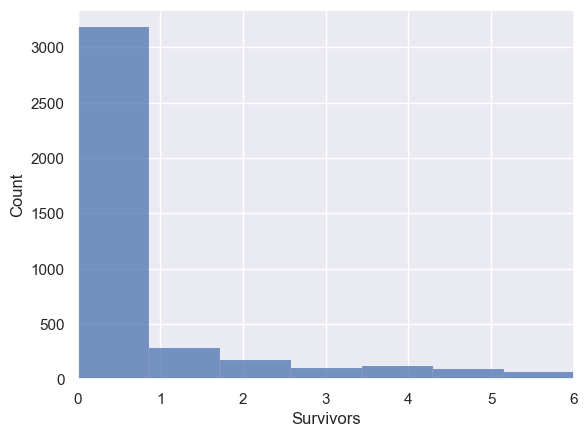

In [178]:
survivors_df = OACI_dataset["Total_Survivors"].dropna()
survivors_df = survivors_df.astype(int)
sns.histplot(data = survivors_df, x = survivors_df.values, bins = 600)
plt.xlabel("Survivors")
plt.xlim(0, 6)
plt.show()

In [179]:
OACI_dataset["Operator"]

0                  Military - U.S. Army
1                                   NaN
2                  Military - U.S. Navy
3                               Private
4                Military - German Navy
                     ...               
5003                  Soloy Helicopters
5004      Military - Nigerian Air Force
5005       Military - Myanmar Air Force
5006    Military - Philippine Air Force
5007      Kamchatka Aviation Enterprise
Name: Operator, Length: 5008, dtype: object

### Military vs Passenger flights

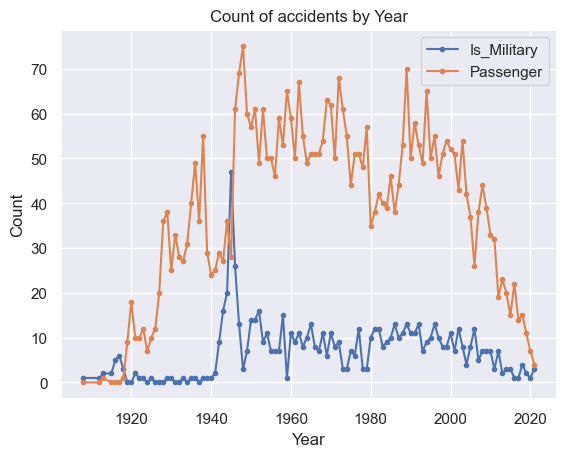

In [180]:
military = OACI_dataset[["Year", "Operator"]].dropna()
military["Is_Military"] = military["Operator"].str.contains("Military",regex = False)
military["Passenger"] = military["Is_Military"] == False
military = military.drop(columns = ["Operator"])
operator_type_count = military.groupby("Year")[["Is_Military", "Passenger"]].sum()
fig, ax = plt.subplots()
ax.plot(operator_type_count.index, operator_type_count["Is_Military"], label = "Is_Military", marker = "o", markersize = 3)
ax.plot(operator_type_count.index, operator_type_count["Passenger"], label = "Passenger", marker = "o", markersize = 3)
ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.set_title("Count of accidents by Year")
ax.legend()
plt.show()

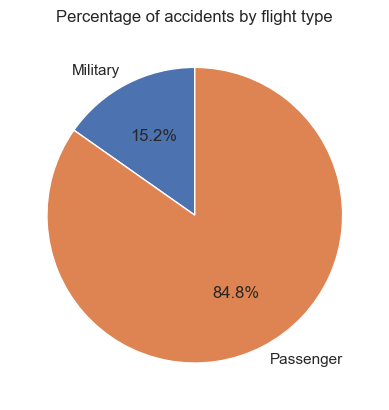

In [181]:
isMilitary = (military["Is_Military"] == True).sum()
Passenger = (military["Is_Military"] == False).sum()
labels = ["Military", "Passenger"]
sizes = [isMilitary, Passenger]
plt.pie(sizes, labels = labels, autopct = "%1.1f%%", startangle = 90)
plt.title("Percentage of accidents by flight type")
plt.show()

### The highest number of accidents is attributed to the operator Aeroflot

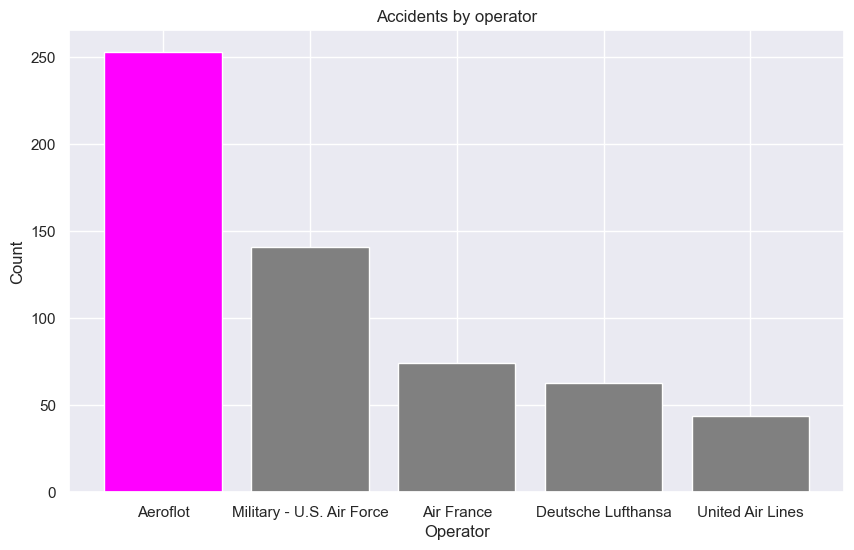

In [182]:
operator_counts = OACI_dataset["Operator"].value_counts().head()
operators = operator_counts.index.tolist()
operator_count = operator_counts.values.tolist()
colors = ["magenta", "gray", "gray", "gray", "gray"]
plt.figure(figsize = (10, 6))
plt.bar(operators, operator_count, color = colors)
plt.xlabel("Operator")
plt.ylabel("Count")
plt.title("Accidents by operator")
plt.show()

### The number of accidents in comercial routes is small compared to the number of accidents during training

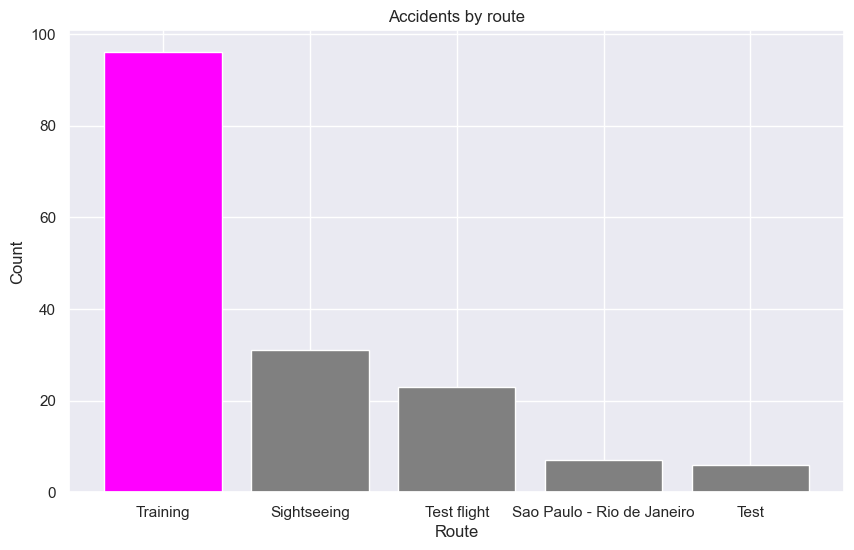

In [183]:
rout_counts = OACI_dataset["Route"].value_counts().head()
routs = rout_counts.index.tolist()
rout_count = rout_counts.values.tolist()
colors = ["magenta", "gray", "gray", "gray", "gray"]
plt.figure(figsize = (10, 6))
plt.bar(routs, rout_count, color = colors)
plt.xlabel("Route")
plt.ylabel("Count")
plt.title("Accidents by route")
plt.show()

### In the original dataset, we only have information about the accidents, so we will load a dataset with the total number of flight passengers per year to make a comparison

*Dataset link: https://data.worldbank.org/indicator/IS.AIR.DPRT?end=2016&start=1970&view=chart*

In [184]:
total_flights = pd.read_csv("Datasets/API.csv")
total_flights.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Air transport - registered carrier departures ...,IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2132.0,2276.0000,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Air transport - registered carrier departures ...,IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,548834.772,534810.3035,556341.0,562927.0,630147.0,705127.4846,717795.3,286064.1974,399895.848,NaN
2,Afghanistan,AFG,Air transport - registered carrier departures ...,IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,21696.000,25920.0000,23532.0,22770.0,24207.0,10454.0000,7334.0,4635.7140,2865.737,NaN


### Count the number of flight passengers per year

In [185]:
Totals = total_flights.drop(["Country Name", "Country Code", "Indicator Name", "Indicator Code"], axis = 1)
Totals = Totals.replace(np.nan, 0)
Totals = pd.DataFrame(Totals.sum())
Totals = Totals.drop(Totals.index[0:10])
Totals = Totals["1970":"2021"]
Totals.columns = ["Sum"]
Totals.index.name = "Year"
Totals.head()

,Sum
Year,
1970,57053400.0
1971,57472700.0
1972,48266700.0
1973,59104500.0
1974,64818300.0


### Count the number of fatalities per year

In [186]:
Fatalities = OACI_dataset.groupby(OACI_dataset["Year"]).sum()
Fatalities = Fatalities.reset_index()
Fatalities["Year"] = Fatalities["Year"].apply(str)
Fatalities.index = Fatalities["Year"]
del Fatalities["Year"]
Fatalities = Fatalities["1970":"2022"]
Fatalities = Fatalities["Total_Fatalities"]
Fatalities.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4080\3568919163.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Fatalities = OACI_dataset.groupby(OACI_dataset["Year"]).sum()


Year
1970    1920.0
1971    1784.0
1972    2796.0
1973    2323.0
1974    2242.0
Name: Total_Fatalities, dtype: float64

### Observe the decrease in the number of passengers in 2020 due to the coronavirus pandemic

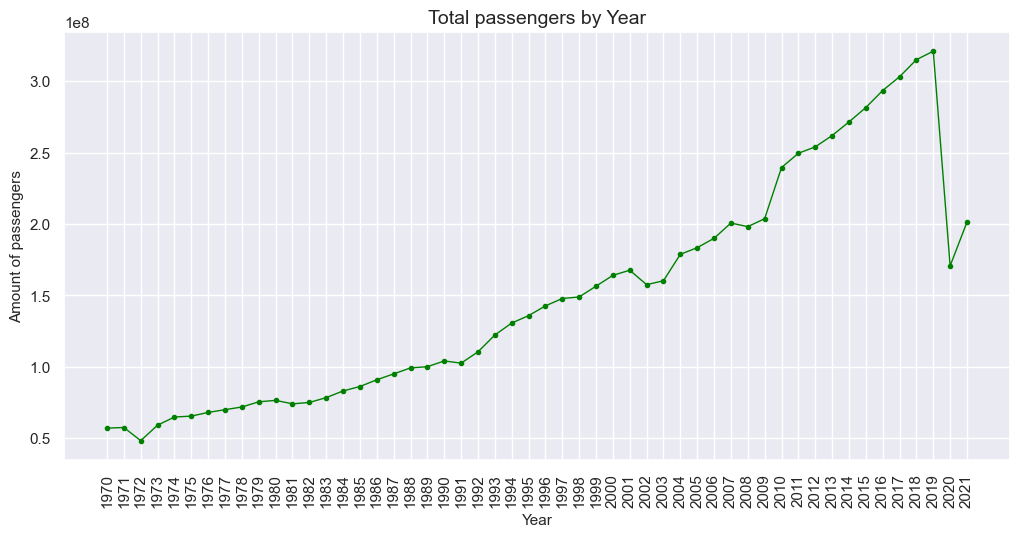

In [187]:
Totals = pd.concat([Totals, Fatalities], axis = 1)
Totals["mortality_ratio"] = Totals["Total_Fatalities"] / Totals["Sum"]
gs = gridspec.GridSpec(2, 2)
plt.figure(figsize = (20, 10))
ax = plt.subplot(gs[0, 0]) 
plt.plot(Totals.index, "Sum", data = Totals, marker = ".", color = "green", linewidth = 1)
plt.xlabel("Year", fontsize = 11)
plt.ylabel("Amount of passengers", fontsize = 11)
plt.title("Total passengers by Year", loc = "Center", fontsize = 14)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### Despite the high number of accidents, we can observe that the passenger count also significantly increased, resulting in a decreased mortality ratio

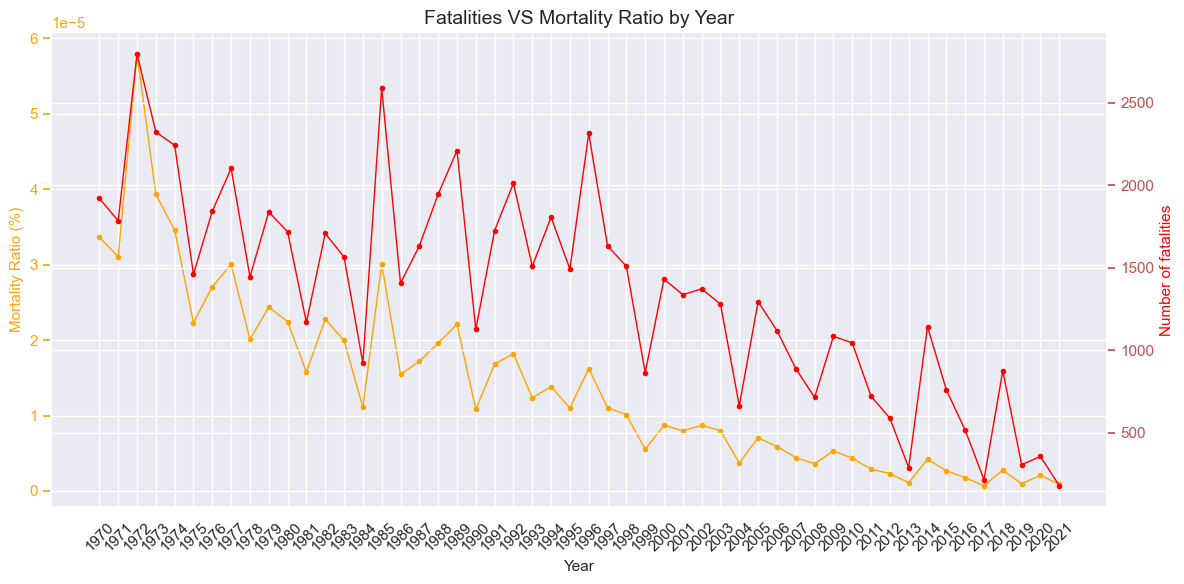

In [188]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.subplots()
ax1.plot(Totals.index, "mortality_ratio", data = Totals, color = "orange", marker = ".", linewidth = 1)
ax1.set_xlabel("Year", fontsize = 11)
for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
ax1.set_ylabel("Mortality Ratio (%)", color = "orange", fontsize = 11)
ax1.tick_params("y", colors = "orange")
ax2 = ax1.twinx()
ax2.plot(Fatalities.index, Fatalities.values, color = "red", marker = ".", linewidth = 1)
ax2.set_ylabel("Number of fatalities", color = "red", fontsize = 11)
ax2.tick_params("y", colors = "r")
plt.title("Fatalities VS Mortality Ratio by Year", loc = "Center", fontsize = 14)
fig.tight_layout()
plt.show()

### Some esthetic

In [189]:
order = ["Location", "Country", "Year",	"Month", "Weekday", "Operator", "Route", "Type", "Total_Aboard", "Total_Fatalities", "Ground", "Total_Survivors", "Total_Deaths", "Total_Involved", "Summary"]
OACI_dataset = OACI_dataset.reindex(columns = order)

### Look at the final datasets

In [190]:
OACI_dataset.head(3)

,Location,Country,Year,Month,Weekday,Operator,Route,Type,Total_Aboard,Total_Fatalities,Ground,Total_Survivors,Total_Deaths,Total_Involved,Summary
0,"Fort Myer, Virginia",USA,1908,Sep,Thursday,Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,1.0,1.0,2.0,"During a demonstration flight, a U.S. Army fly..."
1,"Juvisy-sur-Orge, France",France,1909,Sep,Tuesday,NaN,Air show,Wright Byplane,1.0,1.0,0.0,0.0,1.0,1.0,Eugene Lefebvre was the first pilot to ever be...
2,"Atlantic City, New Jersey",USA,1912,Jul,Friday,Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,0.0,5.0,5.0,First U.S. dirigible Akron exploded just offsh...


### Impute and delete nulls

In [191]:
OACI_dataset["Location"] = OACI_dataset["Location"].replace(np.nan, "No Data")
OACI_dataset["Operator"] = OACI_dataset["Operator"].replace(np.nan, "No Data")
OACI_dataset["Route"] = OACI_dataset["Route"].replace(np.nan, "No Data")
OACI_dataset["Type"] = OACI_dataset["Type"].replace(np.nan, "No Data")
OACI_dataset["Summary"] = OACI_dataset["Summary"].replace(np.nan, "No Data")
OACI_dataset = OACI_dataset.dropna()
OACI_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4959 entries, 0 to 5007
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          4959 non-null   object 
 1   Country           4959 non-null   object 
 2   Year              4959 non-null   int64  
 3   Month             4959 non-null   object 
 4   Weekday           4959 non-null   object 
 5   Operator          4959 non-null   object 
 6   Route             4959 non-null   object 
 7   Type              4959 non-null   object 
 8   Total_Aboard      4959 non-null   float64
 9   Total_Fatalities  4959 non-null   float64
 10  Ground            4959 non-null   float64
 11  Total_Survivors   4959 non-null   float64
 12  Total_Deaths      4959 non-null   float64
 13  Total_Involved    4959 non-null   float64
 14  Summary           4959 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 619.9+ KB


In [192]:
operator_type_count = operator_type_count.reset_index()
operator_type_count.head()

,Year,Is_Military,Passenger
0,1908,1,0
1,1912,1,0
2,1913,2,1
3,1915,2,0
4,1916,5,0


In [193]:
operator_type_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Year         110 non-null    int64
 1   Is_Military  110 non-null    int64
 2   Passenger    110 non-null    int64
dtypes: int64(3)
memory usage: 2.7 KB


### Save clean datasets

In [194]:
OACI_dataset.to_csv("Accidentes_Aviones_Limpio_2.csv", index = False)
operator_type_count.to_csv("Operator_Type.csv", index = False)